In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

In [ ]:

df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Number of countries represented in the data
with specified NOC:

In [ ]:
print(df['NOC'].nunique())
print(df['NOC'].unique())

230
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB

The different sports represented in the data:

In [5]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

Types of Medals:

In [6]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

Statistics over age of athletes:

In [7]:
print(f"mean age: {df['Age'].mean()}")
print(f"median age: {df['Age'].median()}")
print(f"min age: {df['Age'][df['Age']>0].min()}")
print(f"max age: {df['Age'].max()}")
print(f"standard deviation: {df['Age'].std()}")

mean age: 25.556898357297374
median age: 24.0
min age: 10.0
max age: 97.0
standard deviation: 6.393560847035813


Gender distribution:

<Axes: xlabel='Sex'>

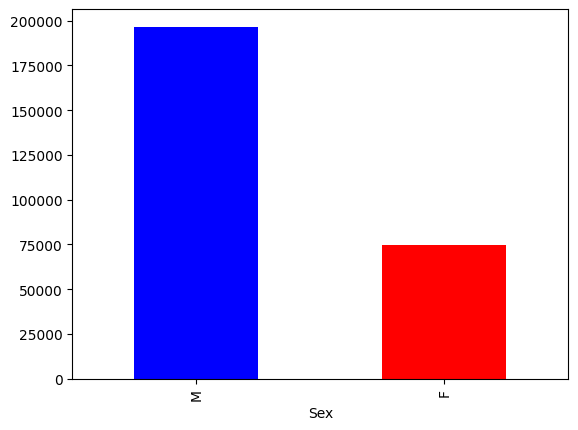

In [8]:
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'red'])

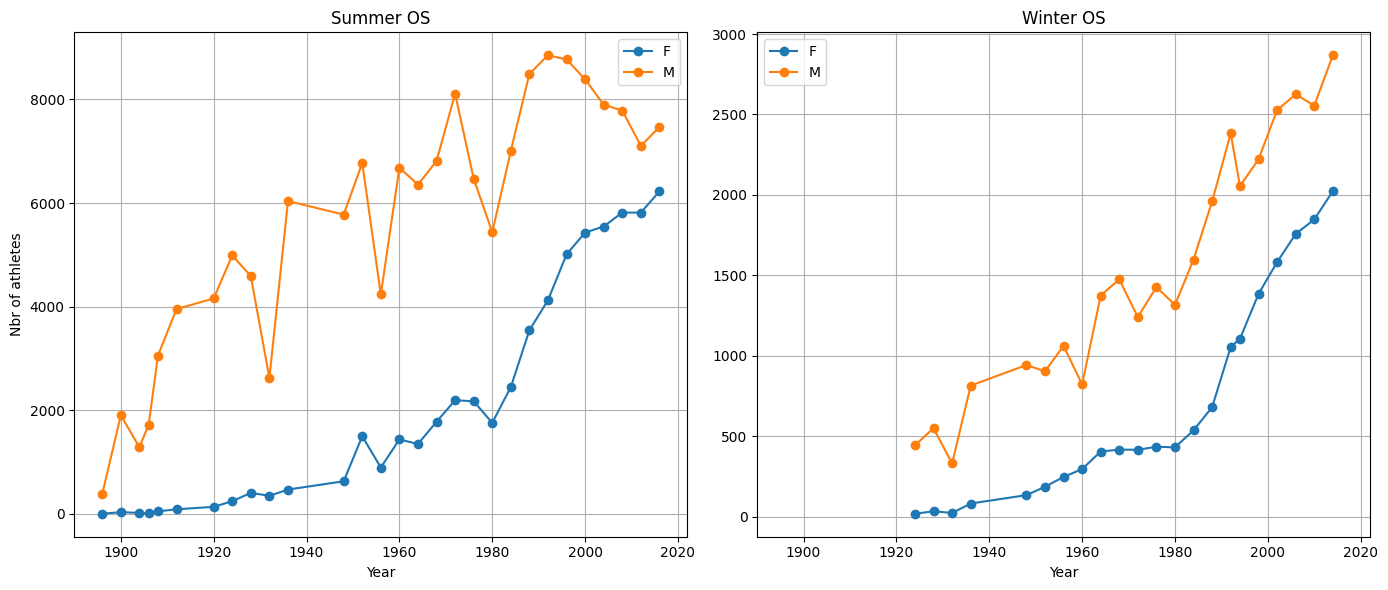

In [9]:

gender_year_season = df.groupby(['Season', 'Year', 'Sex']).size().unstack(fill_value=0)


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

gender_year_season.loc['Summer'].plot(ax=axes[0], marker='o')
axes[0].set_title('Summer OS')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Nbr of athletes')
axes[0].legend()
axes[0].grid(True)

gender_year_season.loc['Winter'].plot(ax=axes[1], marker='o')
axes[1].set_title('Winter OS')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Top 10 countries medal distribution:

<Axes: xlabel='NOC'>

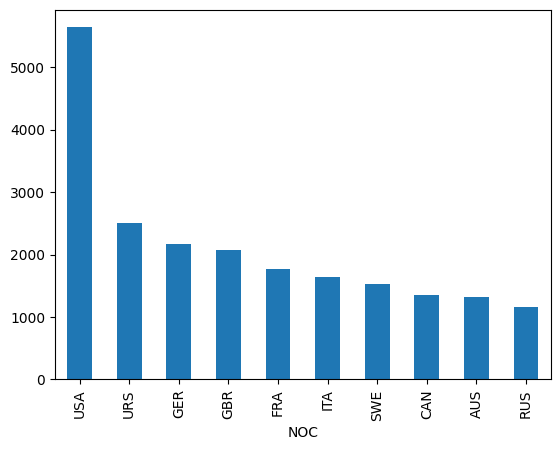

In [10]:
df.groupby('NOC')['Medal'].count().sort_values(ascending=False).iloc[:10].plot.bar()

# ITALIA

Anonimization of athlete names:

In [38]:
df['Name'] = df['Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

Seperating Italian statistics from the data:

In [49]:
italy_df = df[df['NOC'] == 'ITA']
italy_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,353e448e10d4a537e07b61f1729b61e51accc5c64b1983...,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,91,a0ad3d2d065b316c1217d642416bfb83183f2b2b81b064...,M,27.0,190.0,80.0,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,92,342beff5298912bdd9082292716ca5308af049f9b9b136...,M,21.0,180.0,73.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
214,103,d804f1ec585b2a10b827853196aa63e260f4f1426edd65...,M,25.0,NaN,NaN,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,cf742cd48431a0427d64c2d1f817e1d9e78e9159febac4...,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


Italian medals per sport:

<Axes: title={'center': 'Italian medals per sport'}, xlabel='Sport'>

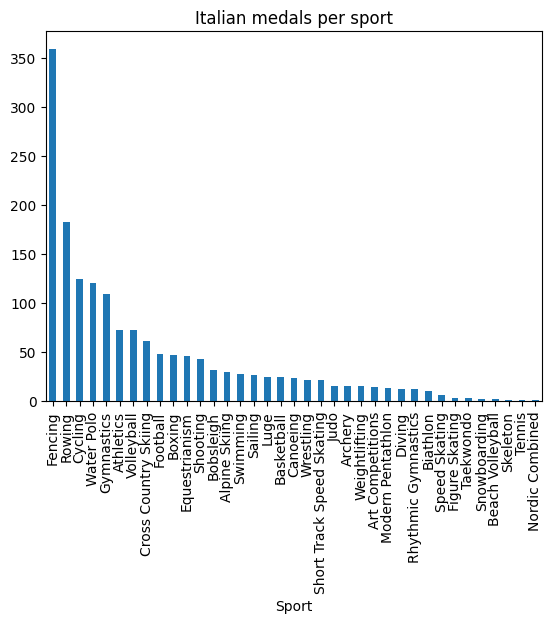

In [40]:
italy_df['Sport'][italy_df['Medal'].notnull()].value_counts().plot.bar(title="Italian medals per sport")

Italian medals per Olympic games:

<Axes: title={'center': 'Italian medals per OS'}, xlabel='Games'>

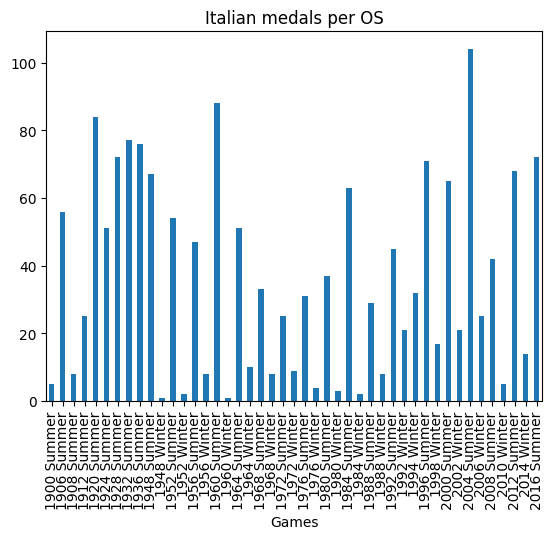

In [41]:
italy_df['Games'][italy_df['Medal'].notnull()].value_counts().sort_index().plot.bar(title="Italian medals per OS")

Italian age distribution:

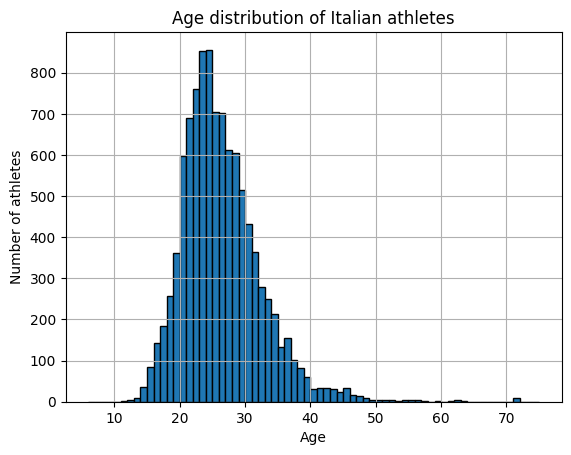

In [42]:
ita_age_min = italy_df['Age'].min()
ita_age_max = italy_df['Age'].max()
italy_df['Age'].hist(bins=range(int(ita_age_min - 5), int(ita_age_max + 5), 1), edgecolor='black')
plt.title("Age distribution of Italian athletes")
plt.xlabel("Age")
plt.ylabel("Number of athletes")
plt.show()

# Equestrianism

Medal distribution between countries (NOC):

<Axes: title={'center': 'Equestrianism medals per country'}, xlabel='NOC'>

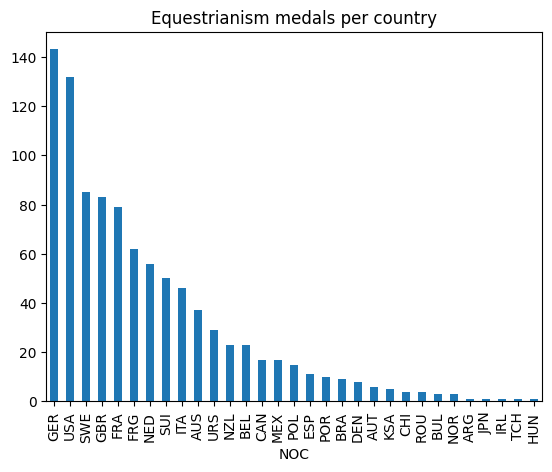

In [43]:
ita_df_equestrianism = italy_df[italy_df['Sport'] == 'Equestrianism']
df_equestrianism = df[df['Sport'] == 'Equestrianism']
df_equestrianism['NOC'][df_equestrianism['Medal'].notnull()].value_counts().plot.bar(title="Equestrianism medals per country")


Age distribution:

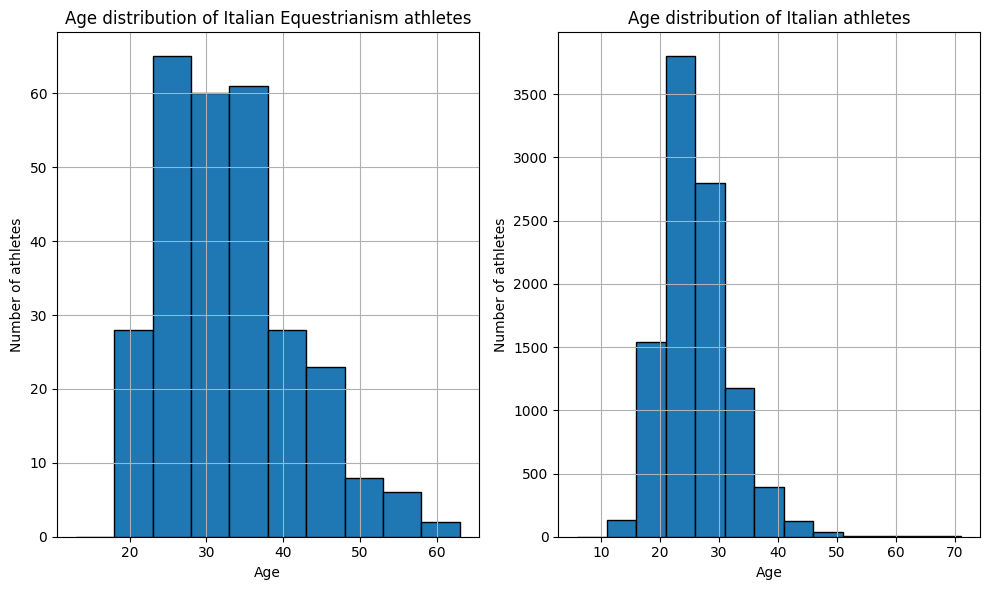

In [44]:
ita_df_otherSports = italy_df[italy_df['Sport'] != "Equestrianism"]

age_min_eq = ita_df_equestrianism['Age'][ita_df_equestrianism['Age'].notnull()].min()
age_max_eq = ita_df_equestrianism['Age'].max()
bins_eq = range(int(age_min_eq - 5), int(age_max_eq + 5), 5)

age_min_other = ita_df_otherSports['Age'][ita_df_otherSports['Age'].notnull()].min()
age_max_other = ita_df_otherSports['Age'].max()
bins_other = range(int(age_min_other - 5), int(age_max_other + 5), 5)

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.hist(ita_df_equestrianism['Age'], bins = bins_eq, edgecolor='black') 
plt.title("Age distribution of Italian Equestrianism athletes")
plt.xlabel("Age")
plt.ylabel("Number of athletes")
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(ita_df_otherSports['Age'], bins = bins_other, edgecolor='black') 
plt.title("Age distribution of Italian athletes")
plt.xlabel("Age")
plt.ylabel("Number of athletes")
plt.grid()

plt.tight_layout()
plt.show()

Average activity span and age span for athletes:

In [45]:
age_span_per_person = ita_df_equestrianism.groupby('Name').agg(
    MinAge=('Age', 'min'),
    MaxAge=('Age', 'max'),
    ActiveYears=('Year', lambda x: x.nunique())
    ).reset_index()

average_min_age = age_span_per_person['MinAge'].mean()
average_max_age = age_span_per_person['MaxAge'].mean()
average_activity_span = age_span_per_person['ActiveYears'].mean()
longest_active = age_span_per_person['ActiveYears'].max()

average_min_age, average_max_age, average_activity_span

(np.float64(29.435294117647057),
 np.float64(33.576470588235296),
 np.float64(1.6956521739130435))

This calculation shows that on average and italian equestrian athlete competes between the ages of 29.4 and 33.6 with an average activity span of 1.7 Olympic Games.

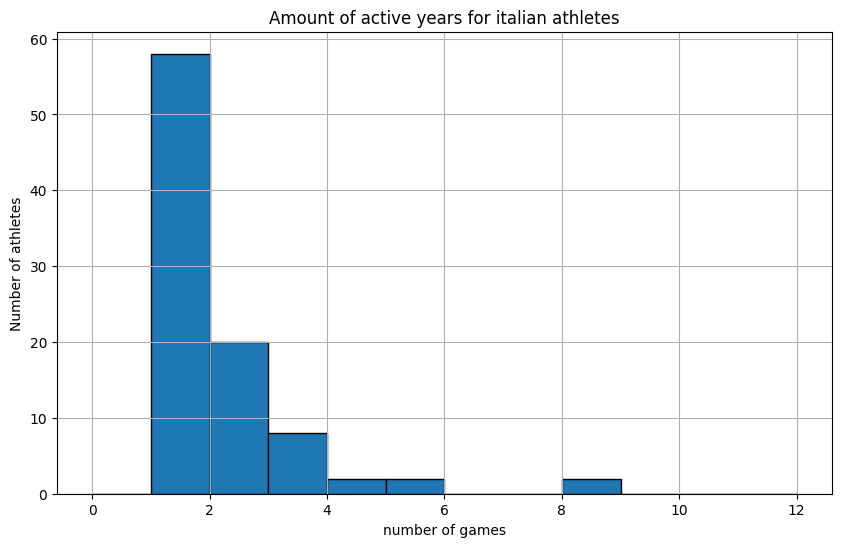

In [46]:
bins=range(0, int(longest_active + 5), 1)
plt.figure(figsize=(10,6))
plt.hist(age_span_per_person['ActiveYears'], bins = bins, edgecolor='black') 
plt.title("Amount of active years for italian athletes")
plt.xlabel("number of games")
plt.ylabel("Number of athletes")
plt.grid()
plt.show()

Gender distribution:

<Axes: title={'center': 'Gender distribution of italian equestrianism athletes over the years'}, xlabel='Year'>

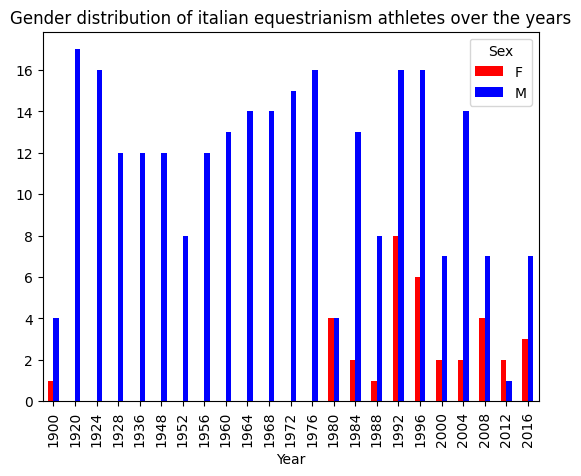

In [47]:
counts = ita_df_equestrianism.groupby(['Year','Sex']).size().unstack()
counts.plot(kind='bar',
            title="Gender distribution of italian equestrianism athletes over the years", 
            color=['red', 'blue'])

<Axes: title={'center': 'Italian Equestrianism medals per year'}, xlabel='Year', ylabel='Number of medals'>

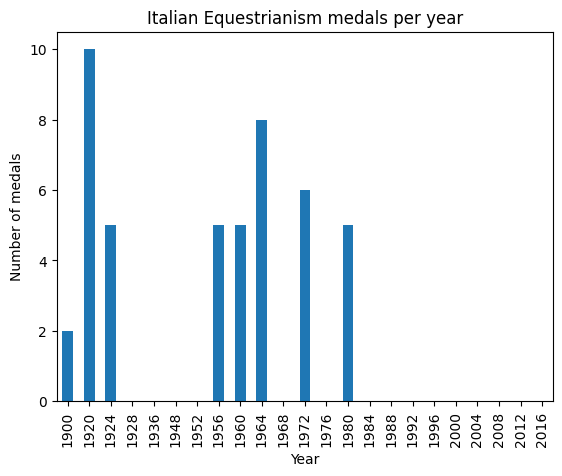

In [48]:
all_years = ita_df_equestrianism['Year'].unique()
medals_per_year = (ita_df_equestrianism[ita_df_equestrianism['Medal'].notnull()].groupby('Year').size())
medals_per_year = medals_per_year.reindex(all_years, fill_value=0).sort_index()

medals_per_year.plot.bar(
    title = "Italian Equestrianism medals per year",
    xlabel = "Year",
    ylabel = "Number of medals"
    ) 